<a href="https://colab.research.google.com/github/bilaslsa/PRAKTIKUM_MACHINE_LEARNING_SEMESTER3/blob/main/PraktikuMandiri12/Mandiri12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Import Library

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer  # Backup jika perlu
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
plt.rcParams['figure.figsize'] = (8, 6)

Load dan EDA Dataset

In [2]:
# Load Dataset Breast Cancer
df = pd.read_csv('/content/drive/MyDrive/PraktikumMandiri12/data/data.csv')
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [3]:
# Informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Statistik deskriptif
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# Cek missing value
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [6]:
# Cek data duplikat
df.duplicated().sum()

np.int64(0)

In [7]:
print("Nama kelas:", df['diagnosis'].unique())
print(df['diagnosis'].value_counts())

Nama kelas: ['M' 'B']
diagnosis
B    357
M    212
Name: count, dtype: int64


In [8]:
# Untuk meilhat ukuran dataset
print("Shape:", df.shape)

Shape: (569, 33)


In [9]:
# Melihat value count dari kolom diagnosis
print(df['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


In [10]:
# Preprocessing: Drop ID, Encode diagnosis (B=0, M=1)
df = df.drop('id', axis=1)
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].values
print("X shape:", X.shape, "y shape:", y.shape)

X shape: (569, 31) y shape: (569,)


In [11]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Train-Test Split dan Standardisasi

In [12]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)
print("Shape X_train:", X_train.shape)
print("Shape X_test :", X_test.shape)

Shape X_train: (398, 31)
Shape X_test : (171, 31)


In [13]:
# Standardisasi (wajib sebelum PCA)
scaler = StandardScaler()

# Drop the 'Unnamed: 32' column which contains only NaNs (it's the last column)
X_train = X_train[:, :-1]
X_test = X_test[:, :-1]

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaled shapes:", X_train_scaled.shape, X_test_scaled.shape)

Scaled shapes: (398, 30) (171, 30)


Baseline SVM (Tanpa PCA)

In [14]:
# 7. Baseline SVM
svm_nopca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_nopca.fit(X_train_scaled, y_train)
ypred_nopca = svm_nopca.predict(X_test_scaled)
acc_nopca = accuracy_score(y_test, ypred_nopca)
print(f"Baseline Accuracy: {acc_nopca:.4f}")
print(classification_report(y_test, ypred_nopca))
print("Confusion Matrix:\n", confusion_matrix(y_test, ypred_nopca))

Baseline Accuracy: 0.9591
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       107
           1       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Confusion Matrix:
 [[107   0]
 [  7  57]]


PCA Transformasi (3 Komponen)

In [15]:
# 8. PCA n_components=3
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("PCA shapes:", X_train_pca.shape, X_test_pca.shape)

# 9. Explained Variance Ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

PCA shapes: (398, 3) (171, 3)
Explained Variance Ratio: [0.4369247  0.19226383 0.09744728]
Total Variance Explained: 0.7266358034087429


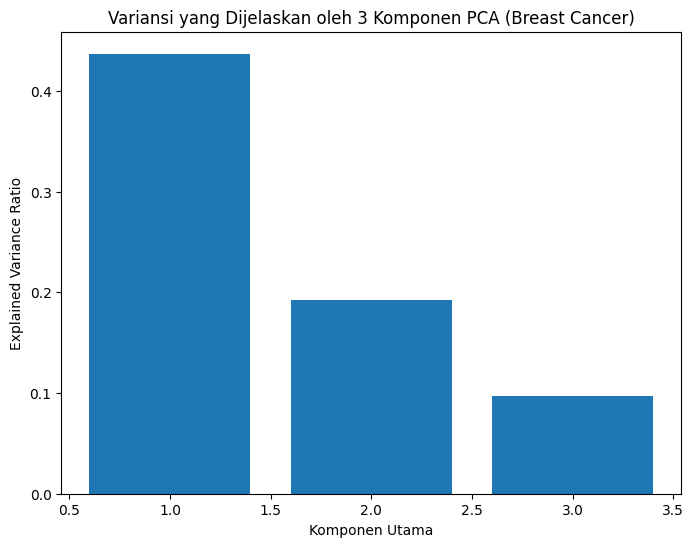

In [16]:
#  Menampilkan Variansi yang Dijelaskan oleh Setiap Komponen PCA.
explained_var = pca.explained_variance_ratio_
plt.bar([1, 2, 3], explained_var)
plt.xlabel('Komponen Utama')
plt.ylabel('Explained Variance Ratio')
plt.title('Variansi yang Dijelaskan oleh 3 Komponen PCA (Breast Cancer)')
plt.show()

Visualisasi Explained Variance

SVM dengan PCA

In [17]:
# 11. SVM + PCA
svm_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)
ypred_pca = svm_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, ypred_pca)
print(f"PCA SVM Accuracy: {acc_pca:.4f}")
print(classification_report(y_test, ypred_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test, ypred_pca))

PCA SVM Accuracy: 0.9591
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       107
           1       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Confusion Matrix:
 [[107   0]
 [  7  57]]


Visualisasi 3D PCA

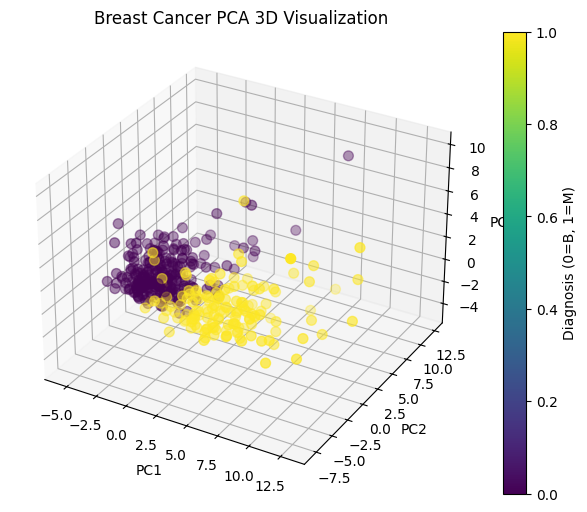

In [18]:
# 12. 3D Scatter Plot (PC1, PC2, PC3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2],
                    c=y_train, cmap='viridis', s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Breast Cancer PCA 3D Visualization')
plt.colorbar(scatter, label='Diagnosis (0=B, 1=M)')
plt.show()

In [19]:
# Membandingkan hasil model tanpa dan dengan PCA
comparison = pd.DataFrame({
    'Model': ['SVM Tanpa PCA', 'SVM Dengan PCA (3 Komponen)'],
    'Jumlah Fitur': [30, 3],
    'Akurasi': [acc_nopca, acc_pca]
})
print(comparison)

                         Model  Jumlah Fitur   Akurasi
0                SVM Tanpa PCA            30  0.959064
1  SVM Dengan PCA (3 Komponen)             3  0.959064


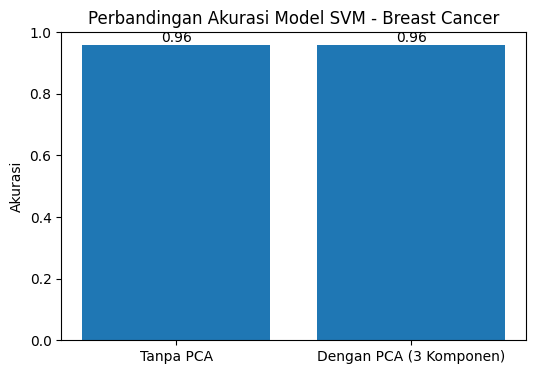

In [20]:
import matplotlib.pyplot as plt

# Pastikan variabel akurasi ini sudah ada:
# acc_nopca = akurasi SVM tanpa PCA
# acc_pca   = akurasi SVM dengan PCA 3 komponen

plt.figure(figsize=(6, 4))
plt.bar(['Tanpa PCA', 'Dengan PCA (3 Komponen)'],
        [acc_nopca, acc_pca])

plt.title('Perbandingan Akurasi Model SVM - Breast Cancer')
plt.ylabel('Akurasi')
plt.ylim(0, 1)

# Tulis nilai akurasi di atas bar
for i, v in enumerate([acc_nopca, acc_pca]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.show()
